##### Assignment: Week 5 & Week 6 Exercise, Data Formats/Data Structures/Data Sources
##### Name: Prashant Raghuwanshi
##### Date: 10/08/2021
##### Course: DSC540-T301 Data Preparation (2221-1)

###### Complete the following exercises. You can submit a Jupyter Notebook or a PDF of your code. If you submit a .py file you need to also include a PDF or attachment of your results.

###### 1. Data Wrangling with Python: Activity 7, page 207

In [1]:
# Import libraries
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
#reading the data from html file by using bs4
fd = open("C:/Users/dell/Documents/docker/List of countries by GDP (nominal) - Wikipedia.htm", "r", encoding="utf8")
soup = BeautifulSoup(fd)
fd.close

<function TextIOWrapper.close()>

In [3]:
# Calculate the tables counts in html document:
all_tables_cnt = soup.find_all("table")
print("Total number of tables are {}".format(len(all_tables_cnt)))

Total number of tables are 9


In [4]:
# list out right table by using class attribute
data_table = soup.find("table", {"class": '"wikitable"|}'})
print(type(data_table))

<class 'bs4.element.Tag'>


In [5]:
#find out tr_elements
tr_elements = soup.find_all('table')[2].find_all('tr')

In [6]:
# Seperate source and actual data
sources = data_table.tbody.findAll('tr', recursive=False)[0]
sources_list = [td for td in sources.find_all('td')]
print(len(sources_list))

3


In [7]:
# using findAll functions to find the data from the data_table body tag
data = data_table.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False)

In [8]:
# using findAll function to find out the data from data_table td
data_tables = []
for td in data:
    data_tables.append(td.findAll('table'))
# find the length of data table
len(data_tables)

3

In [9]:
# getting list of source name
sources_names = [sources.findAll('a')[0].getText() for sources in sources_list]
print(sources_names)

['International Monetary Fund', 'World Bank', 'United Nations']


In [10]:
# seperate the header and  data for the source name
header1 = [th.getText().strip() for th in data_tables[0][0].findAll('thead')[0].findAll('th')]
header1

['Rank', 'Country', 'GDP(US$MM)']

In [11]:
#find the rows from data table using findAll
rows1 = data_tables[0][0].findAll('tbody')[0].findAll('tr')[1:]

In [12]:
# find data from rows1 by using strip function for each td tag
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]

In [13]:
#create dataframe
df1 = pd.DataFrame(data_rows1, columns=header1)
df1.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,600"
1,2,China[n 1],"12,014,610"
2,3,Japan,"4,872,135"
3,4,Germany,"3,684,816"
4,5,United Kingdom,"2,624,529"


In [14]:
# seperate the header and  data for the second source name
header2 = [th.getText().strip() for th in data_tables[1][0].findAll('thead')[0].findAll('th')]
header2

['Rank', 'Country', 'GDP(US$MM)']

In [15]:
#find the rows from data table using findAll for source 2
rows2 = data_tables[1][0].findAll('tbody')[0].findAll('tr')[1:]

In [16]:
# find data from rows1 by using strip function for each td tag
data_rows2_a = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows2]
data_rows2_a

[['1', 'United States', '7007193906040000000♠19,390,604'],
 ['', 'European Union[23]', '7007172776980000000♠17,277,698'],
 ['2', 'China[n 4]', '7007122377000000000♠12,237,700'],
 ['3', 'Japan', '7006487213700000000♠4,872,137'],
 ['4', 'Germany', '7006367743900000000♠3,677,439'],
 ['5', 'United Kingdom', '7006262243400000000♠2,622,434'],
 ['6', 'India', '7006259749100000000♠2,597,491'],
 ['7', 'France', '7006258250100000000♠2,582,501'],
 ['8', 'Brazil', '7006205550600000000♠2,055,506'],
 ['9', 'Italy', '7006193479800000000♠1,934,798'],
 ['10', 'Canada', '7006165304300000000♠1,653,043'],
 ['11', 'Russia[n 2]', '7006157752400000000♠1,577,524'],
 ['12', 'South Korea', '7006153075100000000♠1,530,751'],
 ['13', 'Australia', '7006132342100000000♠1,323,421'],
 ['14', 'Spain', '7006131132000000000♠1,311,320'],
 ['15', 'Mexico', '7006114991900000000♠1,149,919'],
 ['16', 'Indonesia', '7006101553900000000♠1,015,539'],
 ['17', 'Turkey', '7005851102000000000♠851,102'],
 ['18', 'Netherlands', '700582

In [17]:
# Removing unwanted data values by using strip function
def find_right_text(i, td):
    if i == 0:
        return td.getText().strip()
    elif i == 1:
        return td.getText().strip()
    else:
        index = td.text.find("♠")
        return td.text[index+1:].strip()

In [18]:
# find data from rows2 by using strip function for each td tag
data_rows2 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]

In [19]:
#create dataframe 2
df2 = pd.DataFrame(data_rows2, columns=header2)
df2.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


In [20]:
# seperate the header and  data for the third source name
header3 = [th.getText().strip() for th in data_tables[2][0].findAll('thead')[0].findAll('th')]
header3

['Rank', 'Country', 'GDP(US$MM)']

In [21]:
#find the rows from data table using findAll for source 3
rows3 = data_tables[2][0].findAll('tbody')[0].findAll('tr')[1:]

In [22]:
# find data from rows3 by using strip function for each td tag
data_rows3 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows3]

In [23]:
#create dataframe 3
df3 = pd.DataFrame(data_rows3, columns=header3)
df2.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


###### 2. Data Wrangling with Python: Activity 8, page 233

In [24]:
# load libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# loading data to dataframe
df_visit = pd.read_csv("C:/Users/dell/Documents/Packt-Data_Wrangling/Lesson 6/visit_data.csv")
df_visit.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [26]:
# find out the duplicates present in required columns
print("Is Duplicate data is present in first_name columns - {}".format(any(df_visit.first_name.duplicated())))
print("Is Duplicate data is present in last_name columns - {}".format(any(df_visit.last_name.duplicated())))
print("Is Duplicate data is present in email_name columns - {}".format(any(df_visit.email.duplicated())))

Is Duplicate data is present in first_name columns - True
Is Duplicate data is present in last_name columns - True
Is Duplicate data is present in email_name columns - False


In [27]:
# find out the null present in required columns
print(f"is null is present in email -- {df_visit.email.isnull().values.any()}")
print(f"is null is present in ipaddress -- {df_visit.ip_address.isnull().values.any()}")
print(f"is null is present in visit -- {df_visit.visit.isnull().values.any()}")

is null is present in email -- False
is null is present in ipaddress -- False
is null is present in visit -- True


In [28]:
save_old_shape = df_visit.shape

In [29]:
# use numpy.isfinite() , fix if an element is finite or not. 
df_visit = df_visit[np.isfinite(df_visit['visit'])]

In [30]:
size_after = df_visit.shape
print(f"old size {save_old_shape} new size{size_after}")

old size (1000, 7) new size(974, 7)


{'whiskers': [<matplotlib.lines.Line2D at 0x18cb7320790>,
 'caps': [<matplotlib.lines.Line2D at 0x18cb7320e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x18cb7320430>],
 'medians': [<matplotlib.lines.Line2D at 0x18cb7337550>],
 'fliers': [<matplotlib.lines.Line2D at 0x18cb73378b0>],
 'means': []}

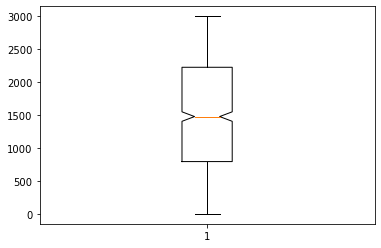

In [31]:
#plot boxplot to find outliers data
plt.boxplot(df_visit.visit, notch=True)

###### herei found the lots of data points exist in between 700 to 2300, so removing outliers below 100 and above 2900

In [32]:
df_visit_fix = df_visit[(df_visit['visit'] <= 2900) & (df_visit['visit'] >= 100)]

In [33]:
# new shape of dh after fixing outliers
df_visit_fix.shape

(923, 7)

{'whiskers': [<matplotlib.lines.Line2D at 0x18cb7459400>,
 'caps': [<matplotlib.lines.Line2D at 0x18cb7459ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18cb74590a0>],
 'medians': [<matplotlib.lines.Line2D at 0x18cb74641c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18cb7464520>],
 'means': []}

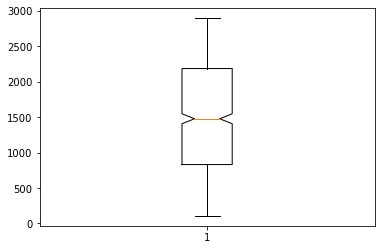

In [34]:
#plot boxplot to after fixing outliers data
plt.boxplot(df_visit_fix.visit, notch=True)

###### 3. Insert data into a SQL Lite database – create a table with the following data (Hint: Python for Data Analysis page 191):

a. Name, Address, City, State, Zip, Phone Number

In [35]:
# import sqllite library
import sqlite3

In [36]:
# create ddl statement variable
create_table_sql = """CREATE TABLE IF NOT EXISTS projects (
	Name VARCHAR[20],
	Address text NOT NULL,
	City VARCHAR[10],
	State  VARCHAR[10],
	Phone_Number VARCHAR[10]
);"""


In [37]:
# establish connection with default sqllite connector
con = sqlite3.connect('mydata.sqlite')

In [38]:
# execute ddl statement 
con.execute(create_table_sql)

In [39]:
#Commit the transaction 
con.commit()

b. Add at least 10 rows of data and submit your code with a query generating your results.

In [40]:
# create data list contains sample data for projects table
data = [('Prashant', 'test add1', 'moline', 'IL', '123456789'), ('Prashant1', 'test add2', 'moline', 'IL', '123456789'), ('Prashant3', 'test add1', 'moline', 'IL', '123456789'), ('Prashant4', 'test add1', 'moline', 'IL', '123456789'), ('Prashant5', 'test add1', 'moline', 'IL', '123456789'), ('Prashant6', 'test add1', 'moline', 'IL', '123456789'), ('Prashant7', 'test add1', 'moline', 'IL', '123456789'), ('Prashant8', 'test add1', 'moline', 'IL', '123456789'), ('Prashant9', 'test add1', 'moline', 'IL', '123456789'), ('Prashant10', 'test add1', 'moline', 'IL', '123456789')]

In [41]:
# create sql select statemet variable
sql_statement = "INSERT INTO projects VALUES(?, ?, ?, ?, ?)"

In [42]:
# execute ddm statement 
con.executemany(sql_statement, data)

In [43]:
#Commit the transaction 
con.commit()

In [44]:
# pull out records from table
cursor = con.execute('select * from projects')
#fetch all rows by using cursor
rows = cursor.fetchall()
# display the fetched data
rows 

[('Prashant', 'test add1', 'moline', 'IL', '123456789'),
 ('Prashant1', 'test add2', 'moline', 'IL', '123456789'),
 ('Prashant3', 'test add1', 'moline', 'IL', '123456789'),
 ('Prashant4', 'test add1', 'moline', 'IL', '123456789'),
 ('Prashant5', 'test add1', 'moline', 'IL', '123456789'),
 ('Prashant6', 'test add1', 'moline', 'IL', '123456789'),
 ('Prashant7', 'test add1', 'moline', 'IL', '123456789'),
 ('Prashant8', 'test add1', 'moline', 'IL', '123456789'),
 ('Prashant9', 'test add1', 'moline', 'IL', '123456789'),
 ('Prashant10', 'test add1', 'moline', 'IL', '123456789'),
 ('Prashant', 'test add1', 'moline', 'IL', '123456789'),
 ('Prashant1', 'test add2', 'moline', 'IL', '123456789'),
 ('Prashant3', 'test add1', 'moline', 'IL', '123456789'),
 ('Prashant4', 'test add1', 'moline', 'IL', '123456789'),
 ('Prashant5', 'test add1', 'moline', 'IL', '123456789'),
 ('Prashant6', 'test add1', 'moline', 'IL', '123456789'),
 ('Prashant7', 'test add1', 'moline', 'IL', '123456789'),
 ('Prashant8', 